# @Sitabja Pal, 06/10/18, Multiple Linear Regression using Sklearn package

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [10]:
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Data Preprocessing and Encoding Dummy Variable

In [16]:
x=data.iloc[:,:-1].values
y=data.iloc[:,4].values

In [17]:
labelencoder=LabelEncoder()
x[:,3]=labelencoder.fit_transform(x[:,3])
hotencoder=OneHotEncoder(categorical_features=[3])
x=hotencoder.fit_transform(x).toarray()
x=x[:,1:]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) # train test split
#x_train.shape

# Regression

In [18]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
print(x_test[:,2],y_pred,sep='\n')

[ 66051.52 100671.96 101913.08  27892.92 153441.51  72107.6   20229.59
  61136.38  73994.56 142107.34  55493.95  46014.02  75328.87  46426.07
  91749.16]
[104282.76472172 132536.88499212 133910.85007767  72584.77489417
 179920.92761889 114549.31079233  66444.43261347  98404.96840123
 114499.82808601 169367.50639894  96522.62539981  88040.67182871
 110949.99405526  90419.1897851  128020.46250063]


Text(0,0.5,'Profit')

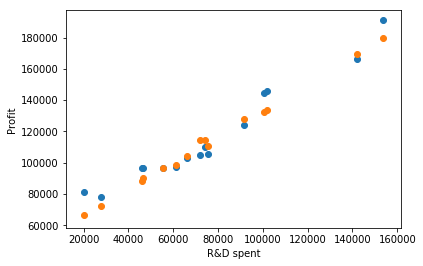

In [19]:
plt.scatter(x_test[:,2],y_test)
plt.scatter(x_test[:,2],y_pred)
plt.xlabel("R&D spent")
plt.ylabel("Profit")

## Backward Elimination to make the model more Optimized

In [20]:
x=np.append(arr=np.ones((50,1)).astype(int) ,values=x,axis=1)
#x.shape
x_opt=x[:,[0,1,2,3,4,5]]
regressor_ols=sm.OLS(endog=y,exog=x_opt).fit()
regressor_ols.summary()
x_opt=x[:,[0,1,3,4,5]]
regressor_ols=sm.OLS(endog=y,exog=x_opt).fit()
regressor_ols.summary()
x_opt=x[:,[0,3,4,5]]
regressor_ols=sm.OLS(endog=y,exog=x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           4.53e-30
Time:                        01:19:52   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""